In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow import keras

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [ ]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.0

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Bag','Ankle boot']

In [ ]:
class_names[y_train[0]]

'Coat'

### Sequential API를 사용하여 모델 만들기

In [ ]:
 # Sequential 모델 만들기
model=keras.models.Sequential([
          keras.layers.Flatten(input_shape=[28,28]),#Flatten():입력 이미지를 1D 배열로 변환
          keras.layers.Dense(300,activation='relu'),#뉴런 300개를 가진 Dense 은닉층을 추가, ReLU활성화 함수를 사용 
          keras.layers.Dense(100,activation='relu'),
          keras.layers.Dense(10,activation='softmax')                
])

In [ ]:
# summary(): 모델에 있는 모든 층을 출력
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense_7'

In [ ]:
model.get_layer('dense_7') is hidden1

True

In [ ]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.03662661, -0.0163139 ,  0.0671376 , ...,  0.00157493,
        -0.03875434, -0.01363337],
       [ 0.01885529, -0.04304339,  0.06225747, ..., -0.02129287,
         0.05104509,  0.0059782 ],
       [ 0.01642106,  0.01275697, -0.0690979 , ...,  0.04550061,
         0.03286961, -0.03409079],
       ...,
       [ 0.05345276,  0.06242728,  0.03743576, ...,  0.04423016,
         0.01553056,  0.06642108],
       [-0.05545387, -0.045491  , -0.0135045 , ..., -0.06151043,
        -0.02429297, -0.0016852 ],
       [-0.04937495,  0.00784002,  0.05716987, ..., -0.010549  ,
        -0.02740555, -0.04369245]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', #optimizer에 sgd를 지정하면 기본 확률적 경사 하강법을 사용하여 모델을 훈련한다는 의미
              metrics=['accuracy'])#훈련과 평가 시에 정확도를 측정하기 위해 'accuracy'로 지정

#### 모델 훈련과 평가

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54304/55000 [============================>.] - ETA: 0s - loss: 0.7180 - acc: 0.7653

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 3s 59us/sample - loss: 0.7163 - acc: 0.7655 - val_loss: 0.5164 - val_acc: 0.8226
Epoch 2/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4877 - acc: 0.8305 - val_loss: 0.4500 - val_acc: 0.8484
Epoch 3/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4443 - acc: 0.8453 - val_loss: 0.4221 - val_acc: 0.8572
Epoch 4/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4181 - acc: 0.8544 - val_loss: 0.4329 - val_acc: 0.8512
Epoch 5/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.3988 - acc: 0.8608 - val_loss: 0.3815 - val_acc: 0.8686
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3825 - acc: 0.8655 - val_loss: 0.3847 - val_acc: 0.8652
Epoch 7/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3697 - acc: 0.8705 - val_loss: 0.3646 - val_acc: 0.8740
Epoch 8/30
55000/55000 [==============

- 훈련정확도(acc)와 검증 정확도(val_acc)가 꾸준히 상승하는 것을 확인 가능.
- 반면에, 훈련 손실(loss)과 검증 손실(val_loss)은 감소한다.


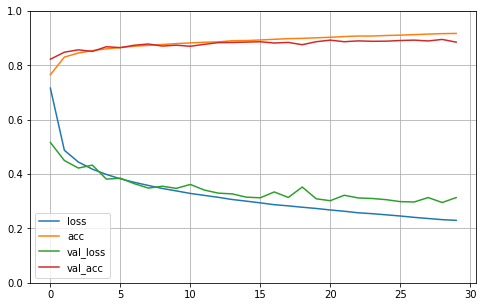

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

[0.3475991967082024, 0.8754]

#### 모델을 사용해 예측을 만들기

In [ ]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
#가장 높은 확률을 가진 클래스에만 관심이 있다면 predict_classes() 메서드 사용 가능
y_pred=model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [ ]:
import numpy as np
np.array(class_names)[y_pred]

IndexError: ignored

In [ ]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)